###Defining the Question

**a) Specifying the question**<br>
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  <br>

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

b) Metrics of success <br>

Our analysis will be considered a success if we are able distinguish the best supporting vector machine and the best regression on descision trees according to their performance and accuracy score.

c) Understanding the context.<br>
Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

What is hypothyroidism? In short, your thyroid gland can’t make enough hormones to function well. The thyroid gland controls every aspect of your body’s metabolism. In hypothyroidism, the gland’s hormone production slows. This, in turn, slows your metabolism, which can lead to weight gain. Hypothyroidism is common, and affects about 4.6 percent of the U.S. population.<br>

As its name suggests, hyperthyroidism occurs when your body makes too much of the thyroid hormones, thyroxine (T4) and triiodothyronine (T3), and becomes overactive. If you have hyperthyroidism, you may experience a fast heartbeat, increased appetite, anxiety, sensitivity to heat, or sudden weight loss. 

Working for data collected by Nairobi Hospital, we will try predict the status by the features given.

**d) Experimental design**<br>
* Defining the Question
* Data Preparation
* Data Cleaning
* Univariate Analysis
* Bivariate Analysis
* Decision Trees
* Support Vector Machine
* Challenging the solution
* Conclusion

###Data Preparation

In [116]:
#importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
#loading our dataset
df = pd.read_csv('/content/hypothyroid.csv')

In [3]:
#previewing top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#previewing bottom of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
#viewing our columns to see what  we are working with
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [6]:
#getting shape of our dataset
df.shape

(3163, 26)

In [7]:
#getting information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
#Checking datatypes of columns
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [9]:
#creating a separate copy of the dataset that we will do a bit of cleaning for SVM
dfclean = df.copy()
dfclean

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


###Data Cleaning

In [10]:
#checking for null values
dfclean.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

We see we have no null values.

In [11]:
#checking number of duplicate rows
dfclean.duplicated().sum()

77

In [12]:
#locating the duplicate rows so as to decide whether to delete
dfclean.loc[dfclean.duplicated(), :]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [13]:
#given our intention of prediction of hyperthyroidism we drop the duplicate columns
dfclean.drop_duplicates(inplace=True)
dfclean.duplicated().sum()

0

In [14]:
#checking our columns names
dfclean.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Our dataset doesn't need any renaming of columns.

In [16]:
#checking unique values for all columns to check for any anomalies
for col in dfclean.columns.to_list():
  print(f'{col} column unique values: ')
  print(dfclean[col].unique(), end='\n\n')

status column unique values: 
['hypothyroid' 'negative']

age column unique values: 
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']

sex column unique values: 
['M' 'F' '?']

on_thyroxine column unique values: 
['f' 't']

query_on_thyroxine column unique values: 
['f' 't']

on_antithyroid_medication column unique values: 
['f' 't']

thyroid_surgery column unique values: 
['f' 't']

query_hypothyroid column unique values: 
['f' 't']

query_hyperthyroid column unique values: 
['f' 't']

pregnant column unique values: 
['f' 't']

sick column unique values: 
['f' 't']

tumor colu

We note that on 'Sex'and 'TBG' columns we have '?' object that doesn't seem uniform to the rest according to our judgement. They looked like nulls. We will therefore replace them with NaN so as to view them and decide what to do with them.

In [17]:
#replacing the '?' value with NaN for missing values
dfclean.replace(to_replace='?', inplace=True, value=np.NaN)

In [25]:
#defining our categorical and numerical columns and converting the datatypes
cat_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured']

# Numerical columns array 
num_cols = ['age','TSH','T3', 'TT4', 'T4U', 'FTI']

# for loop for converting columns to the right data types
for column in dfclean.columns:
  if column in num_cols:
    dfclean[column] = dfclean[column].astype('float')
  elif column in cat_cols:
    dfclean[column] = dfclean[column].astype('category')
#confirming change
dfclean.dtypes

status                         object
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object

In [19]:
dfclean.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

Out of 3163 rows of the wholedataset TBG has 2835 nulls of '?' . We therefore decide to drop the two columns. TBG_measured and TBG

In [20]:
#dropping the columns
dfclean.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

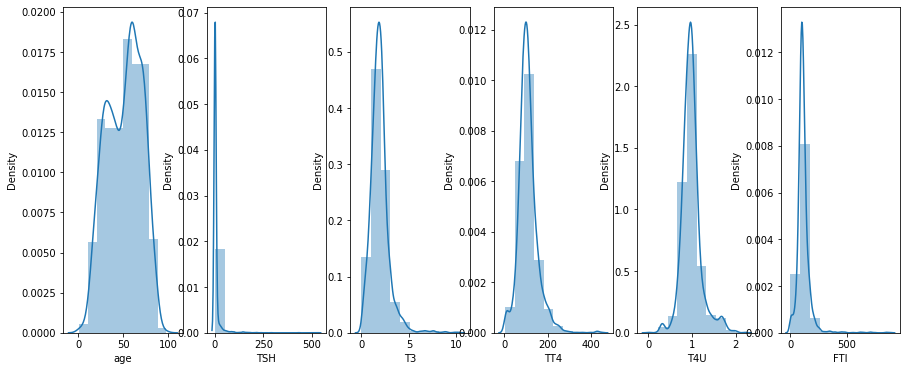

In [21]:
#checking distribution in our remaining columns with missing values
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize= (15,6))

sns.distplot(dfclean.age, ax=ax1, bins= 10)
sns.distplot(dfclean.TSH, ax=ax2, bins= 10)
sns.distplot(dfclean.T3, ax=ax3, bins= 10)
sns.distplot(dfclean.TT4, ax=ax4, bins= 10)
sns.distplot(dfclean.T4U, ax=ax5, bins= 10)
sns.distplot(dfclean.FTI, ax=ax6, bins= 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution')

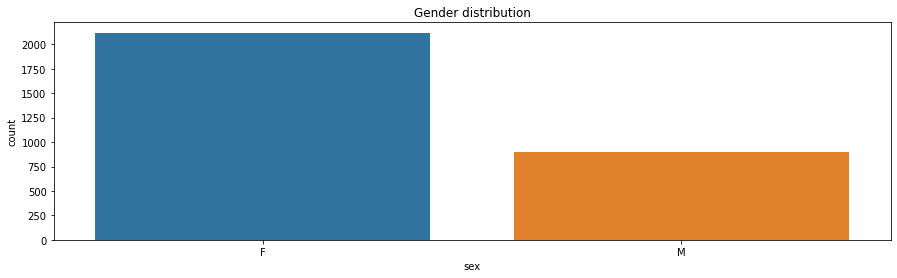

In [22]:
#checking distribution for gender so as to know what to replace with
plt.figure(figsize=(15, 4))
sns.countplot(dfclean['sex'], order = dfclean['sex'].value_counts().index);
plt.title('Gender distribution')

They are all normally distributed with some columns having some skewness to one side. We therefore decided to replace all NaN with mean but for the 'sex' column we replace with mode since the column is categorical

In [23]:
#Replacing missing values as explained above
dfclean['age'].fillna(dfclean['age'].mean(), inplace = True)
dfclean['TSH'].fillna(dfclean['TSH'].mean(), inplace = True)
dfclean['T3'].fillna(dfclean['T3'].mean(), inplace = True)
dfclean['TT4'].fillna(dfclean['TT4'].mean(), inplace = True)
dfclean['T4U'].fillna(dfclean['T4U'].mean(), inplace = True)
dfclean['FTI'].fillna(dfclean['FTI'].mean(), inplace = True)
dfclean['sex'].fillna(dfclean['sex'].mode(), inplace = True)

In [26]:
#checking if datset is now null free
dfclean.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
dtype: int64

In [27]:
#seems 'sex' didnt replace, using alternative method for it
dfclean['sex'].fillna('F', inplace = True)
dfclean.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

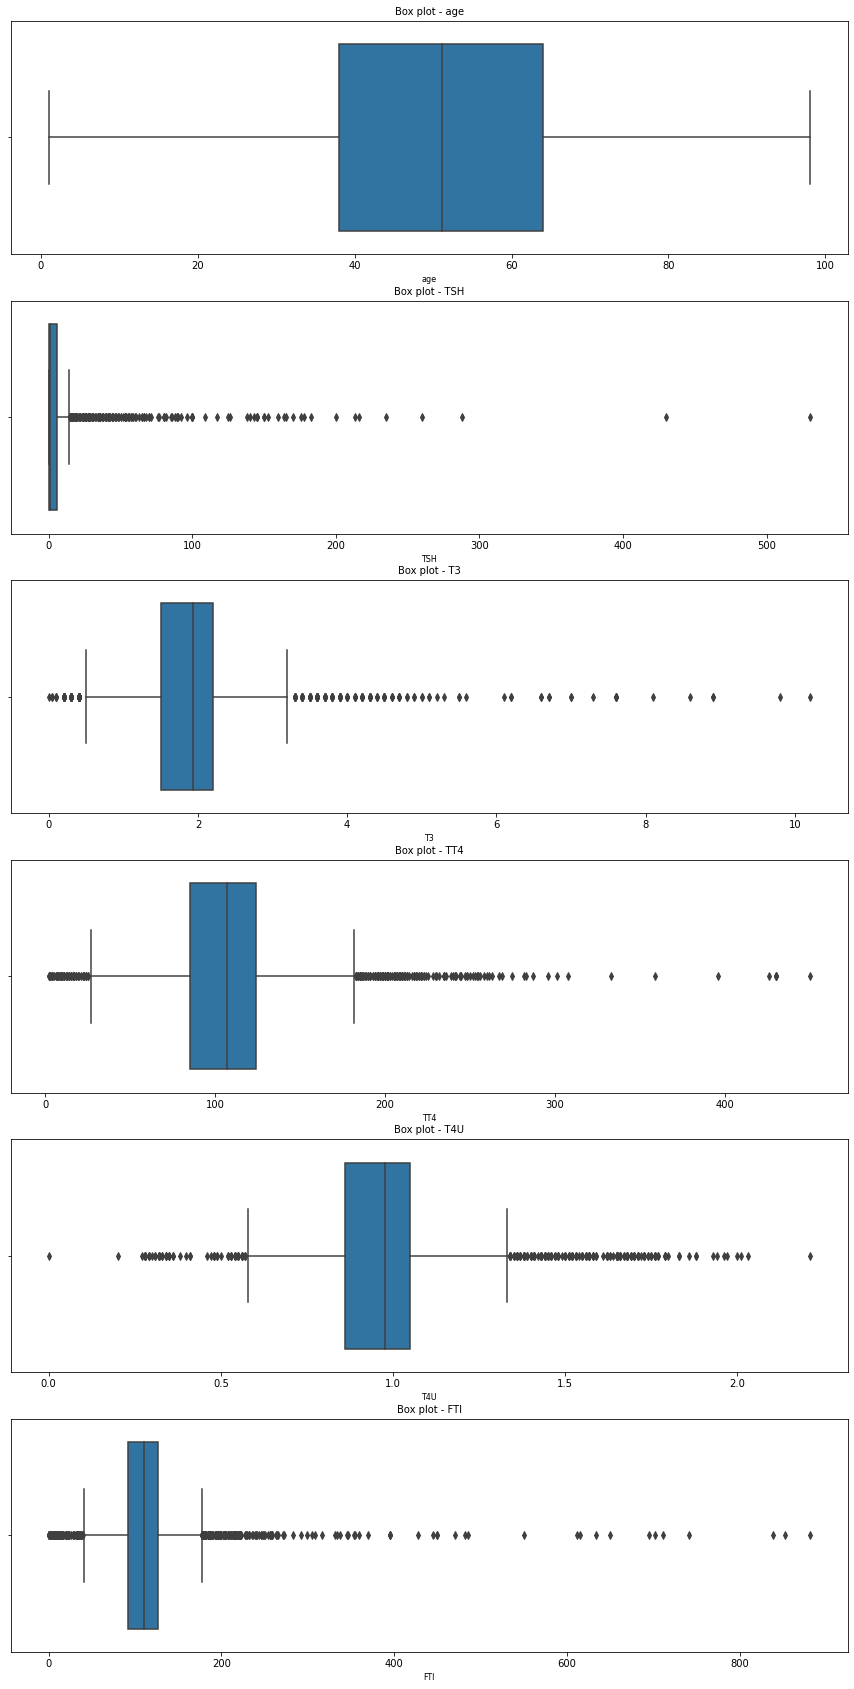

In [39]:
#checking for outliers
fig, ax = plt.subplots(len(num_cols), figsize= (15,30))

for i, col_val in enumerate(num_cols):
  sns.boxplot(dfclean[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [42]:
#Checking for number of outliers
Q1 = dfclean.quantile(0.25)
Q3 = dfclean.quantile(0.75)
IQR = Q3 -Q1
out = ((dfclean[num_cols] < (Q1 - 1.5 * IQR)) |(dfclean[num_cols] > (Q3 + 1.5 * IQR))).sum()
out

age      0
TSH    193
T3     240
TT4    238
T4U    240
FTI    285
dtype: int64

###Univariate Analysis

In [47]:
#gettting the summary statistics
dfclean.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,5.809320,1.933666,108.706922,0.977559,115.489080
std,17.854431,22.180994,0.864826,42.836471,0.216873,57.780967
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.112538,1.000000,1.933666,107.000000,0.977559,110.000000
75%,64.000000,5.809320,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


In [51]:
#Descriptive statistics
for i in num_cols:
  print(i)
  print(f'mean:  {dfclean[i].mean()}')
  print(f'median:  {dfclean[i].sort_values(ascending=False).median()}')
  print(f'mode:  {dfclean[i].mode()}')
  print(f'skewness:  {dfclean[i].skew()}')
  print(f'The Standard Deviation: {dfclean[i].std()}')
  print(f'The Variance: {dfclean[i].var()}')
  print(f'Kurtosis:  {dfclean[i].kurt()}, \n')

age
mean:  51.11253776435048
median:  51.112537764350456
mode:  0    51.112538
dtype: float64
skewness:  -0.18327889150126656
The Standard Deviation: 17.854430861173032
The Variance: 318.78070137640805
Kurtosis:  -0.6214515094605133, 

TSH
mean:  5.809319650323053
median:  1.0
mode:  0    0.0
dtype: float64
skewness:  11.145456810806497
The Standard Deviation: 22.180994332739
The Variance: 491.99650958899974
Kurtosis:  180.71322067683934, 

T3
mean:  1.9336658354114533
median:  1.9336658354114693
mode:  0    1.933666
dtype: float64
skewness:  2.4537697771079516
The Standard Deviation: 0.86482646769876
The Variance: 0.7479248192323144
Kurtosis:  14.89106068829793, 

TT4
mean:  108.70692199578384
median:  107.0
mode:  0    108.706922
dtype: float64
skewness:  1.5284024697504315
The Standard Deviation: 42.836471205741844
The Variance: 1834.9632653603503
Kurtosis:  7.679569618475355, 

T4U
mean:  0.9775588338602056
median:  0.9775588338602027
mode:  0    0.977559
dtype: float64
skewness:  

all our num_cols are leptokurtic except for age that is mesokurtic. Same to the skewness of the data they are all positively skewed except age. However a few have a excess positive skewness and kurtosis like FTI and FSH columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Hypothyroid Status distribution')

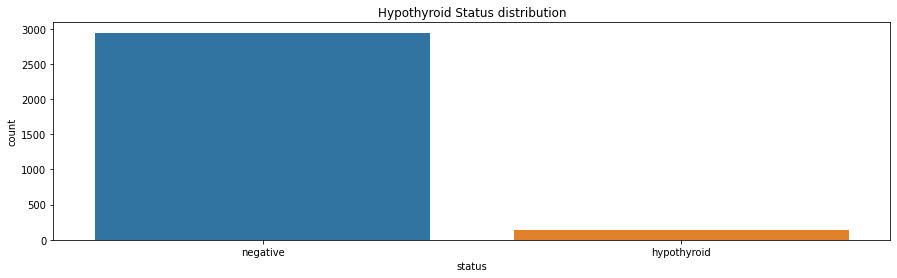

In [53]:
#Hypothyroid status distribution
plt.figure(figsize=(15, 4))
sns.countplot(dfclean['status'], order = dfclean['status'].value_counts().index);
plt.title('Hypothyroid Status distribution')

Most are negative from our dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender distribution')

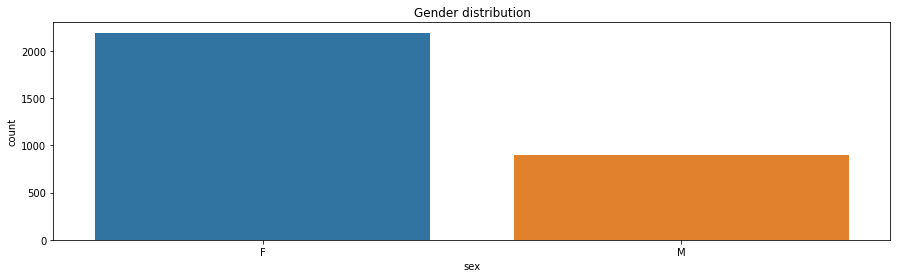

In [52]:
#gender distribution
plt.figure(figsize=(15, 4))
sns.countplot(dfclean['sex'], order = dfclean['sex'].value_counts().index);
plt.title('Gender distribution')

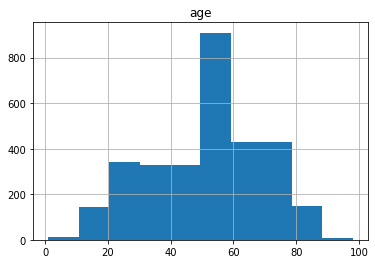

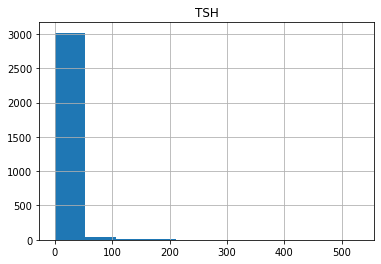

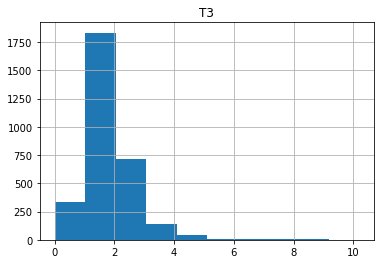

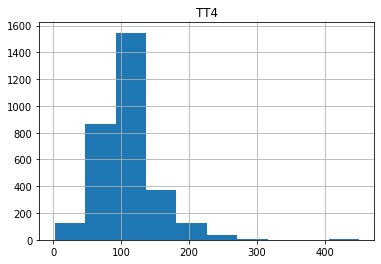

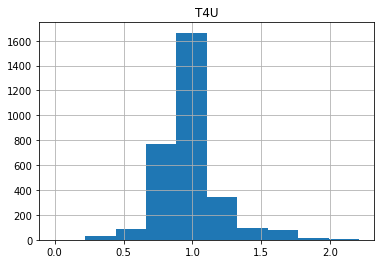

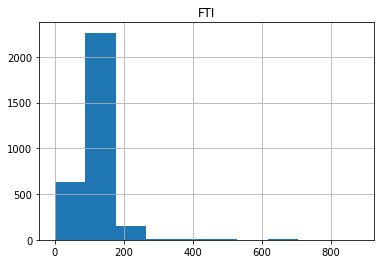

In [54]:
#histogram plot for all numerical columns
for i in num_cols:
  dfclean.hist(i)

Normal distribution with various skewness on each column as explained before.

###Bivariate Analysis

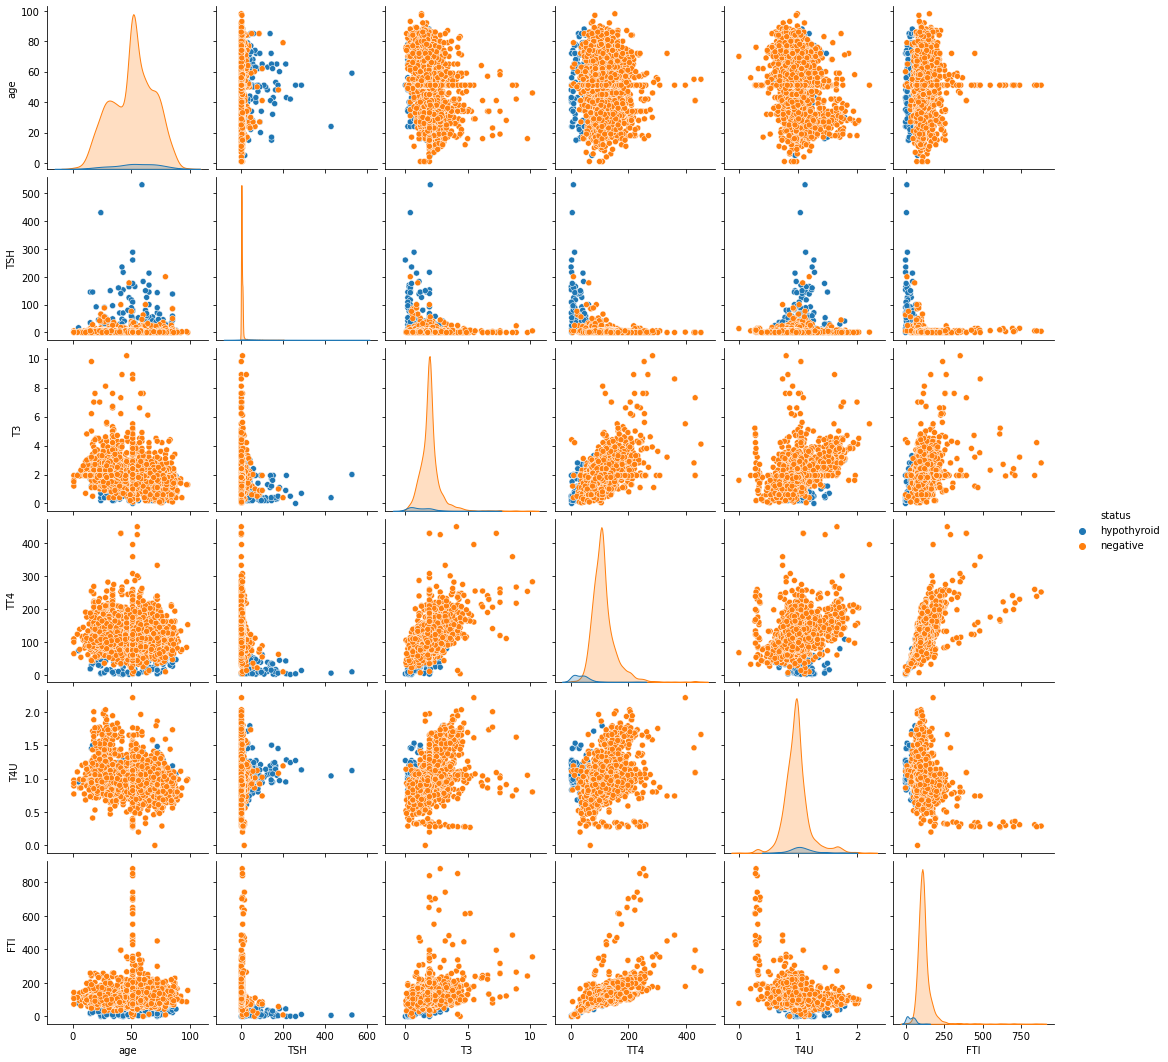

In [46]:
#plotting a pairplot to show correlation and distribution and use the hue parameter 'status' as its 
# the categorical variable we are trying to predict
sns.pairplot(dfclean, hue="status")
plt.show()

The correlation of most columns appears very weak and not distinct. Also negative appears to dominate more 

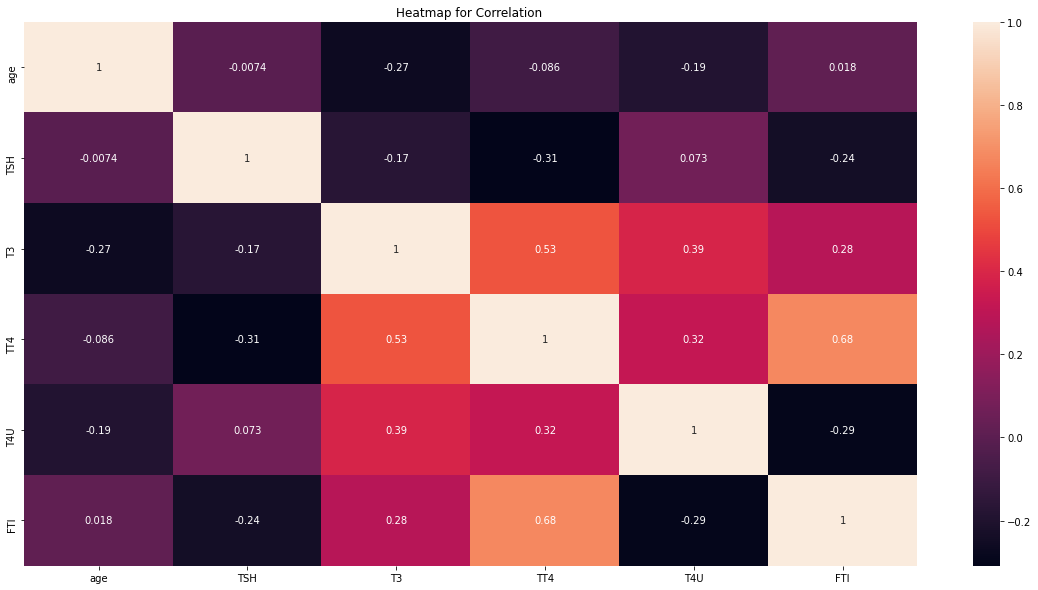

In [45]:
#plotting heatmap
cor = dfclean.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.title('Heatmap for Correlation ')
plt.show()

All the numerical columns corelation are either very weak positive or very weak negative.

###Decision Trees

In [55]:
#label encode the categorical columns
#true,hypothyroid, Female and Yes to 1
# False, no, negative and Male to 0
dfclean = dfclean.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})

In [57]:
#checking encoded dataset
print(dfclean.dtypes)
dfclean

status                         int64
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
dtype: object


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0
3159,0,29.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0
3160,0,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0
3161,0,74.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0


In [63]:
c= dfclean.iloc[:,1:]
c

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,1,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0
3159,29.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0
3160,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0
3161,74.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0


In [69]:
dfclean.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone has hypothyroid, so let's use the status column as our y 
y = dfclean['status'].values
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']


X = dfclean[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [76]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.988673139158576


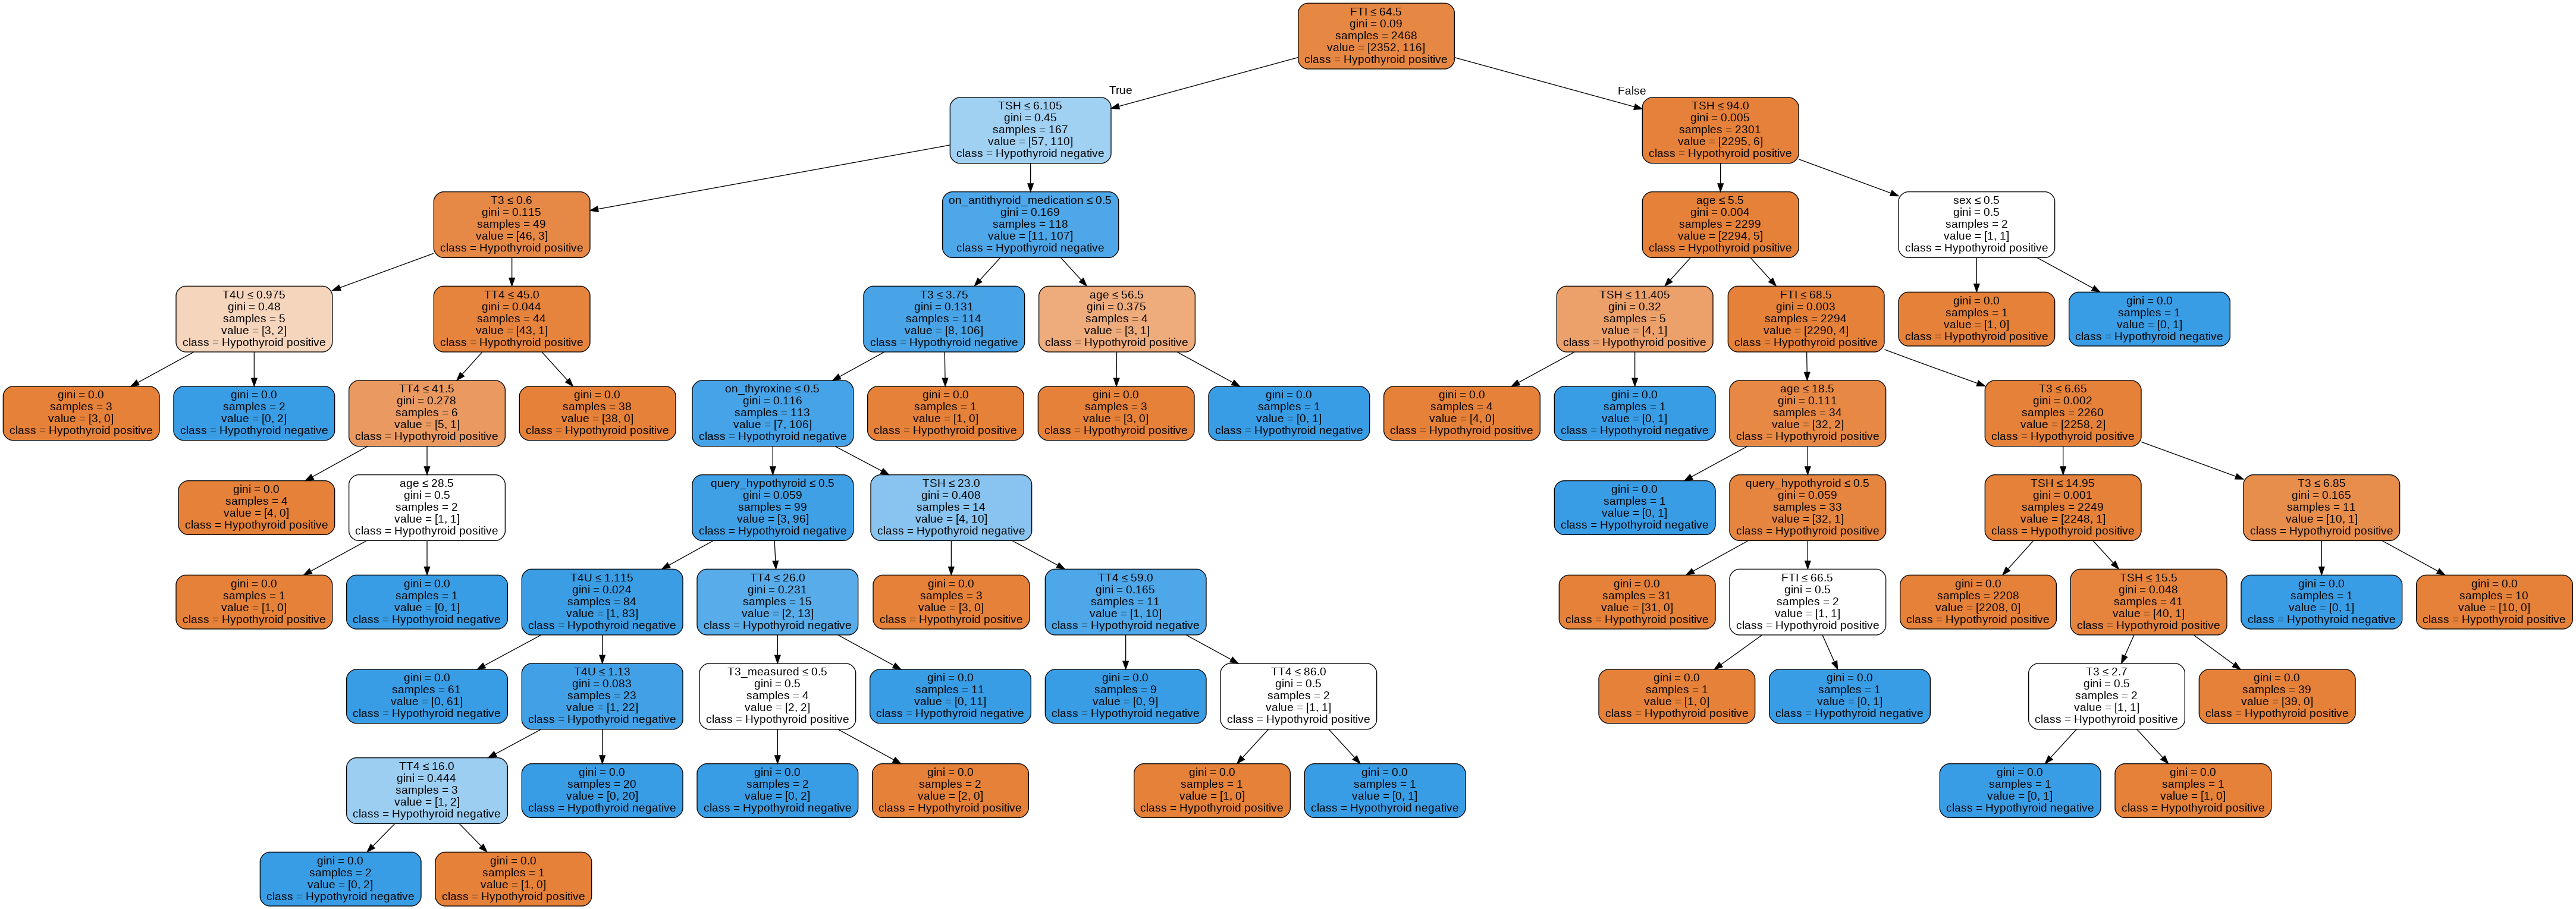

In [78]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Hypothyroid positive', 'Hypothyroid negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

Below let's use the noncleaned dataset and compare accuracy

In [74]:
#label encoding and replacing ? with 0 all across
df = df.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0,"?":0})
#Defiing independent and dependent
y = df['status'].values
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI']


X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9747235387045814


There is no major difference but the cleaned dataset has a higher accuracy score so we will use the cleaned one all through

In [90]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = dfclean['status'].values


test_features = dfclean.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = dfclean[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


           Actual   Predicted
count  618.000000  618.000000
mean     0.040453    0.041691
std      0.197179    0.181866
min      0.000000    0.000154
25%      0.000000    0.000154
50%      0.000000    0.000154
75%      0.000000    0.000154
max      1.000000    0.990148
Mean Absolute Error: 0.012572259273748585
Mean Squared Error: 0.005640924847397697
Root Mean Squared Error: 0.07510609061452804


In [81]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.26), ('T3_measured', 0.01), ('T3', 0.03), ('TT4_measured', 0.0), ('TT4', 0.03), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.61)]

Variable: FTI                  Importance: 0.61
Variable: TSH                  Importance: 0.26
Variable: T3                   Importance: 0.03
Variable: TT4                  Importance: 0.03
Variable: age                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.02
Variable: on_thyroxine         Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3_measured          Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Impor

In [87]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = dfclean['status'].values

selected_features = dfclean[['FTI','TSH','T3','TT4','age','on_antithyroid_medication','on_thyroxine','query_hypothyroid','T3_measured','T4U']]
test_features = selected_features.columns.to_list()
# test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = dfclean[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_frame.describe())

from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


           Actual   Predicted
count  618.000000  618.000000
mean     0.040453    0.041728
std      0.197179    0.181675
min      0.000000    0.000154
25%      0.000000    0.000154
50%      0.000000    0.000154
75%      0.000000    0.000154
max      1.000000    0.990148
Mean Absolute Error: 0.01270739591935071
Mean Squared Error: 0.0056728924665336855
Root Mean Squared Error: 0.07531860637673593


With feature selection our RMSE slightly increases

In [108]:
#gradient boosted regressor
# Split the independent and dependent variables
# let us use all the features
X = dfclean.drop('status', axis =1)
y = dfclean.status

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)
from sklearn.ensemble import GradientBoostingClassifier
# Instantiating the model
gradboost = GradientBoostingClassifier(loss='deviance',n_estimators=200, learning_rate=0.01, max_depth=5)
gradboost = gradboost.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = gradboost.predict(X_test)

from sklearn import metrics

# Measuring the accuracy of the model on the test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Making predictions for our train dataset
y_pred = gradboost.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))


Accuracy: 0.9838187702265372
Accuracy: 0.9991896272285251


The cleaned dataset on random classifier produces more accurate results and the random forest with feature selection has a higher RMSE. However for both random forests we got RMSE higher than predicted mean.

###Support Vector Machine

Our top two variables from feature selection were FTI and TSH and are what we will use in SVM

In [115]:
# let us use all the features
X = dfclean[['FTI', 'TSH']]
y = dfclean.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Below the linear kernel

In [121]:
from sklearn.svm import SVC
# Fit the model
linear = SVC(kernel= 'linear')
linear.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = linear.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred = linear.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print(f'Accuracy : {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.9794816414686826
[[885   3]
 [ 16  22]]
Accuracy: 0.9819444444444444
[[2046   11]
 [  28   75]]


Below the polynomial kernel

In [123]:
# Fit the model
poly = SVC(kernel= 'poly')
poly.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = poly.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred = poly.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'Accuracy: {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))


Accuracy: 0.980561555075594
[[885   3]
 [ 15  23]]


Accuracy: 0.9833333333333333
[[2049    8]
 [  28   75]]


Below the rbf kernel

In [124]:
# Fit the model
rbf = SVC(kernel= 'rbf')
rbf.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred= rbf.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred = rbf.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'Accuracy: {accuracy_score(y_train, y_pred)}')
print(confusion_matrix(y_train, y_pred))

Accuracy: 0.9838012958963283
[[885   3]
 [ 12  26]]


Accuracy: 0.9851851851851852
[[2049    8]
 [  24   79]]


Accuracy on the train test is highest on the rbf kernel. We therefore go by the rbf kernel. Also we notice that for all kernels there isnt much of a difference between the train  and test predictions/accuracy

###Challenging the solution and Conclusion

The cleaned dataset on random classifier produces more accurate results and the random forest with feature selection has a higher RMSE. However for both random forests we got RMSE higher than predicted mean. On SVM we found the rbf kernel to produce more accurate results.